In [1]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

In [2]:
df_undef = pd.read_csv('undef2.tsv', sep='\t', header=None, names=['filename', 'ident'])
df_undef.head()

,filename,ident
0,addlisteners_editor.js,newSound
1,addlisteners_editor.js,solveClick
2,addlisteners_editor.js,cancelClick
3,addlisteners_editor.js,runClick
4,addlisteners_editor.js,saveClick


In [4]:
df_defs = pd.read_csv('defs.tsv', sep='\t', header=None, names=['filename', 'ident', 'lineno', 'kind', 'line'])
df_defs.head()

,filename,ident,lineno,kind,line
0,storagewrapper.js,storage_has,0,function,function storage_has(key) {
1,storagewrapper.js,storage_get,4,function,function storage_get(key) {
2,storagewrapper.js,storage_set,8,function,"function storage_set(key, value) {"
3,storagewrapper.js,storage_remove,12,function,function storage_remove(key) {
4,debug.js,canSetHTMLColors,0,var,var canSetHTMLColors = false


<AxesSubplot:>

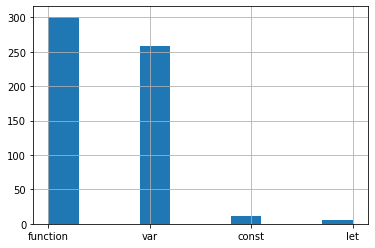

In [7]:
df_defs.kind.hist()

In [112]:
from collections import defaultdict

In [119]:
identmap = defaultdict(list)

for i, row in df_undef.iterrows():
    # print(row)
    ident = row.ident
    f_missing = row.filename
    fs_has = list(df_defs[df_defs.ident == ident].filename)
    if len(fs_has) == 0:
        print("miss:", f_missing, ident)
    elif len(fs_has) != 1:
        print("dup:", fs_has, ident)
    else:
        identmap[(f_missing, fs_has[0])].append(ident)

G = nx.DiGraph()
for ((miss, has), idents) in identmap.items():
    G.add_edge(miss, has, label=str(len(idents)))

In [120]:
nt = Network(notebook=True)
# populates the nodes and edges data structures
nt.from_nx(G)
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
